<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/Bank-27/bank_ds_test_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!gdown --id 1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1plvZ7poGmKX2YWgEUyuaAkjcb7ZvNVS-
To: /content/bank-test-case-ds.csv
100% 4.35M/4.35M [00:00<00:00, 43.0MB/s]


In [3]:
df = pd.read_csv('/content/bank-test-case-ds.csv',sep=';')

In [4]:
df.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1


Задание
Вам предлагается набор данных, содержащий следующие переменные
Переменные, характеризующие кредитную историю клиента
closed_cred_sum - сумма, которую клиент выплатил по ранее взятым и закрытым
кредитам  
closed_creds - количество закрытых кредитов  
active_cred_sum_overdue - суммарная задолженность по активным кредитам  
active_cred_sum - сумма всех активных кредитов  
active_cred_day_overdue - суммарная просрочка в днях по всем активным кредитам  
active_cred_max_overdue - максимальная сумма просроченной задолженности по
активным кредитам  
Переменные характеризующие клиента  
age - возраст  
gender - пол  
region - регион  
month_income - ежемесячный доход  
Переменные, характеризующие кредит, по которому нужно сделать
прогноз  
first_loan - сумма, которую клиент хочет получить в кредит (из заявки)  
first_days_quant - срок, на которую клиент хочет взять кредит  
loan_cost_all - одобренная клиенту сумма кредита  
order_date - дата подачи заявки на получение кредита  
cost_all - сумма всех выплат по одобренному кредиту  
order_id - id заявки  
client_id - id клиента  
Целевая переменная:  
expert - решение, которое принято по заявке (0 - одобрено, 1 - отклонено)  
Необходимо на основе предоставленных данных построить модель для предсказания
целевой переменной. Сделать описание проделанных шагов
● Анализ данных
● Фильтрация
● Преобразование переменных
● Моделирование
● Оценка качества модели
Обоснование выбранной метрики качества.

In [5]:
df['expert']

,expert
0,1
1,1
2,1
3,1
4,1
...,...
49996,1
49997,1
49998,1
49999,1


In [6]:
df['expert'].value_counts()

,count
expert,
1,37464
0,12537


In [7]:
df['expert'].value_counts(normalize=True)

,proportion
expert,
1,0.749265
0,0.250735


In [8]:
df['expert'].mean()

np.float64(0.749265014699706)

In [9]:
df.isna().mean()

,0
closed_cred_sum,0.00000
closed_creds,0.00000
active_cred_sum_overdue,0.00000
active_cred_sum,0.00000
active_cred_day_overdue,0.00000
active_cred_max_overdue,0.00000
age,0.00000
gender,0.00000
region,0.00000
first_loan,0.00038


In [10]:
df.describe()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert
count,5.000100e+04,50001.000000,5.000100e+04,5.000100e+04,50001.000000,5.000100e+04,50001.000000,50001.000000,50001.000000,49982.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,1.865780e+05,7.974001,5.217919e+04,1.964205e+05,722.563769,3.776984e+04,35.018900,0.462691,28.825083,7751.682606,6703.681926,23.954561,24943.402642,1233.828788,734747.279874,290563.956781,0.749265
std,5.057408e+05,13.933307,2.537311e+05,4.365213e+05,1371.656677,1.703992e+05,11.235206,0.498611,29.726162,5310.782009,4610.529844,36.670176,20652.768218,4556.672041,26254.078989,74592.964584,0.433441
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,18.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,695828.000000,109.000000,0.000000
25%,5.502000e+03,1.000000,0.000000e+00,1.467400e+04,0.000000,4.870800e+02,27.000000,0.000000,0.000000,5000.000000,3000.000000,10.000000,0.000000,0.000000,715042.000000,294858.000000,0.000000
50%,4.287400e+04,4.000000,5.000000e+03,5.703022e+04,64.000000,6.765660e+03,32.000000,0.000000,25.000000,7000.000000,7000.000000,20.000000,25000.000000,0.000000,734707.000000,316156.000000,1.000000
75%,1.740713e+05,9.000000,3.157990e+04,1.972360e+05,923.000000,2.449949e+04,41.000000,1.000000,52.000000,10000.000000,10000.000000,20.000000,35000.000000,0.000000,749477.000000,330172.000000,1.000000
max,4.457421e+07,563.000000,3.303100e+07,2.273166e+07,21927.000000,2.170166e+07,99.000000,1.000000,99.000000,100000.000000,100000.000000,336.000000,550000.000000,238770.420000,840692.000000,393528.000000,1.000000


In [11]:
df.dtypes

,0
closed_cred_sum,float64
closed_creds,int64
active_cred_sum_overdue,float64
active_cred_sum,float64
active_cred_day_overdue,int64
active_cred_max_overdue,float64
age,int64
gender,int64
region,int64
first_loan,float64


In [12]:
df[['gender','region']] = df[['gender','region']].astype(str)

In [13]:
train = df.sample(frac=0.7,random_state=42).copy()

In [14]:
val = df[~df.index.isin(train.index)]

In [15]:
len(df)

50001

In [16]:
len(train) + len(val)

50001

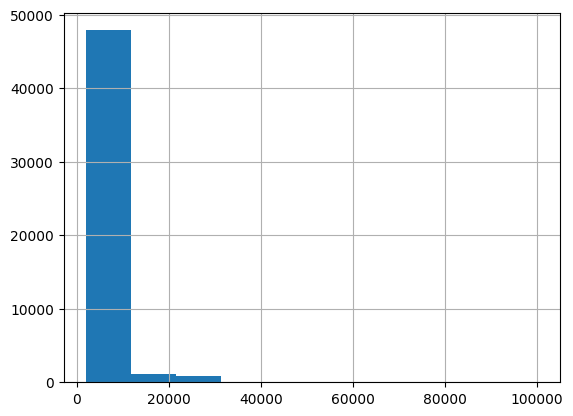

In [17]:
df['first_loan'].hist();

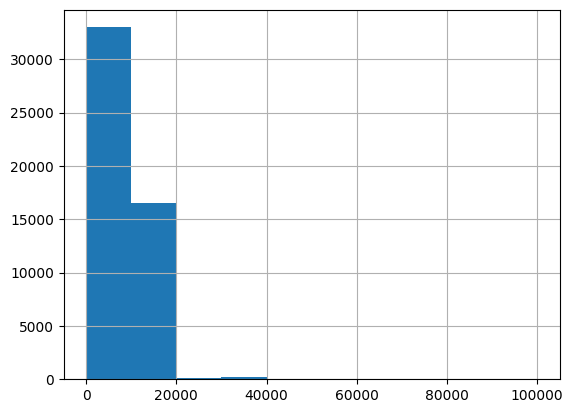

In [18]:
df['loan_cost_all'].hist();

In [19]:
df[['first_loan','loan_cost_all']].describe()

,first_loan,loan_cost_all
count,49982.000000,50001.000000
mean,7751.682606,6703.681926
std,5310.782009,4610.529844
min,2000.000000,0.000000
25%,5000.000000,3000.000000
50%,7000.000000,7000.000000
75%,10000.000000,10000.000000
max,100000.000000,100000.000000


In [20]:
df['first_loan'].value_counts(dropna=False).sort_values(ascending=False).reset_index()

,first_loan,count
0,10000.0,18614
1,7000.0,8200
2,5000.0,6247
3,2000.0,4783
4,3000.0,3902
...,...,...
65,9900.0,1
66,95000.0,1
67,79000.0,1
68,43000.0,1


In [21]:
! pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [22]:
from catboost import CatBoostClassifier

In [22]:
df.columns

In [23]:
df

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.00,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.00,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.00,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.00,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.00,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1


In [24]:
df['region'].value_counts()

,count
region,
0,20061
40,4185
36,1921
75,1778
65,1614
...,...
44,19
85,17
43,16


In [25]:
df['order_date'].agg(['min','max'])

,order_date
min,2017-06-26
max,2017-09-25


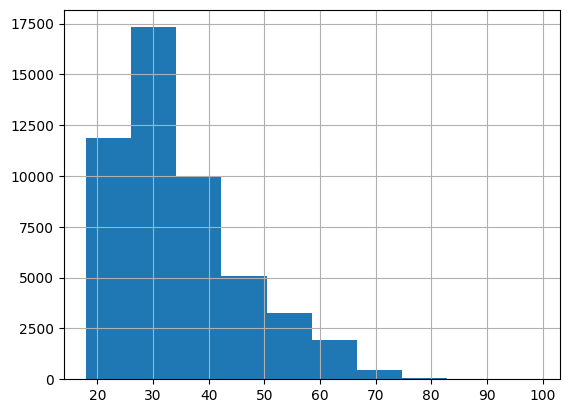

In [27]:
df['age'].hist();

In [28]:
df['age'].describe()

,age
count,50001.000000
mean,35.018900
std,11.235206
min,18.000000
25%,27.000000
50%,32.000000
75%,41.000000
max,99.000000


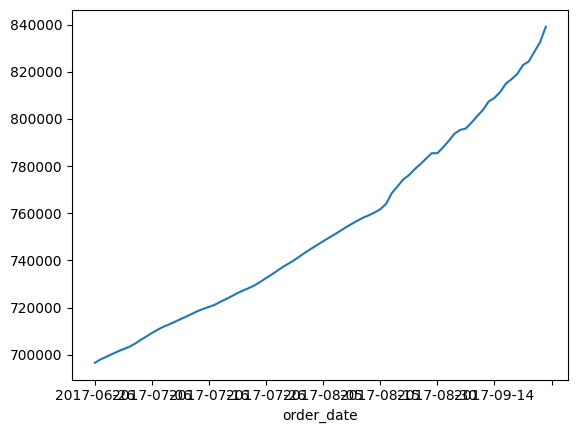

In [32]:
df.groupby('order_date')['order_id'].mean().plot();